In [83]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\98299\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
No handles with labels found to put in legend.


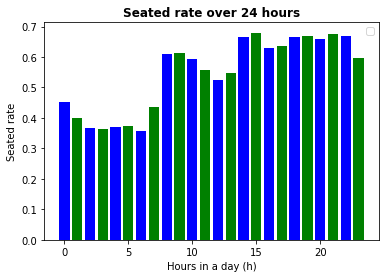

In [125]:
data = pd.read_csv(r'sample_taxi.csv',nrows = 6000000)#6000000 )
data.columns = ['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed']
data['timestamp'] = data['Stime'].str.slice(0,2).astype('int')*3600+data['Stime'].str.slice(3,5).astype('int')*60+data['Stime'].str.slice(6,8).astype('int')
data = data.sort_values(by = ['VehicleNum','timestamp'])
problist = []
def getprob(i):
    datax = data[(data['timestamp']>(i*3600)) & (data['timestamp']<((i+1)*3600))]
    timestamp = datax['timestamp'].values.tolist()
    openstatus = datax['OpenStatus'].values.tolist()
    carnum = datax['VehicleNum'].values.tolist()
    initialcarnum = carnum[0]
    seatedtimelist = []
    seatedtimetotal = 0#record total seated time
    timefrom = 0
    timeto = 0
    curstate = 0
    for i in range(len(timestamp)):
    #print(initialcarnum)
    #print(seatedtimetotal)
        if(carnum[i]!=initialcarnum):
            if(curstate==1):
                timeto = timestamp[i-1]
                seatedtimetotal+=(timeto-timefrom)
            if(seatedtimetotal!=0):
                seatedtimelist.append(seatedtimetotal/3600)
            seatedtimetotal = 0
            initialcarnum = carnum[i]
            curstate = openstatus[i]
            if(curstate==0):
                timefrom = 0
                timeto = 0
            else:
                timefrom = timestamp[i]
                timeto = 0
            continue
        if(openstatus[i]==0):
            if(curstate==0):
                continue
            else:#结算
                timeto = timestamp[i]
            #print("here")
                if((timeto-timefrom)>10000):
                #print("why2")
                    print((timeto,timefrom))
                seatedtimetotal+=timeto-timefrom
                curstate = 0
        else:
            if(curstate==0):
                timefrom = timestamp[i]
                curstate = 1
            else:
                curstate = 1
                continue
    problist.append(sum(seatedtimelist)/len(seatedtimelist))
for i in range(24):
    getprob(i)
#getprob(0)
#plt.bar(range(len(problist)), problist,color='rb')
plt.bar(range(len(problist)), problist, color =  'bg', align =  'center') 
#plt.title('Interesting Graph',fontsize='large'，fontweight='bold')
plt.title('Seated rate over 24 hours',fontsize='large',fontweight='bold')
plt.legend()
plt.ylabel('Seated rate') 
plt.xlabel('Hours in a day (h)')
plt.show()
#datax = data[(data['timestamp']>25200) & (data['timestamp']<32400)]
#datax

In [69]:
import requests
import json

In [76]:
def request_url_get(url):
    """ 请求url方法get方法 """
    try:
        r = requests.get(url=url, timeout=30)
        if r.status_code == 200:
            return r.text
        return None
    except RequestException:
        print('请求url返回错误异常')
        return None
def parse_json(content_json):
    """  解析json函数 """
    result_json = json.loads(content_json)
    return result_json

def request_api(url):
    """ 请求高德api 解析json """
    result = request_url_get(url)
    result_json = parse_json(result)
    return result_json
    #return result

In [97]:
datax1 = data[(data['timestamp']>25200) & (data['timestamp']<32400)]
lng = datax1['Lng'].values.tolist()
lat = datax1['Lat'].values.tolist()
datax2 = data[(data['timestamp']>61200) & (data['timestamp']<68400)]
strlist = []
def run(lng,lat):
    key = 'c27273d6d40b4bf705b47cd2f9ac7b61'
    offset = 20

    index_url = f'https://restapi.amap.com/v3/geocode/regeo?output=json&location={lng},{lat}&key={key}&radius=1000&extensions=base'
    index_result = request_api(index_url)
    strx = json.dumps(index_result, indent=4) 
    strlist.append(strx)

#for i in range(len(lng)):
#    run(lng[i],lat[i])
#fo = open("gaode.json", "w")
#for x in strlist:
#    fo.write(x)

NameError: name 'RequestException' is not defined